In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict


from sklearn import set_config
set_config(transform_output="pandas")

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_colwidth', None)

In [30]:
df = pd.read_csv('topified_vectorized_Science_1900_2023_Semantic_Scholar.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53833 entries, 0 to 53832
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   paperId                   53833 non-null  object 
 1   externalIds               53833 non-null  object 
 2   publicationVenue          30673 non-null  object 
 3   title                     53833 non-null  object 
 4   abstract                  38581 non-null  object 
 5   year                      53833 non-null  int64  
 6   referenceCount            53833 non-null  int64  
 7   citationCount             53833 non-null  int64  
 8   influentialCitationCount  53833 non-null  int64  
 9   fieldsOfStudy             52384 non-null  object 
 10  s2FieldsOfStudy           53833 non-null  object 
 11  publicationTypes          34229 non-null  object 
 12  publicationDate           46284 non-null  object 
 13  title_abstract            53832 non-null  object 
 14  topic_

In [32]:
import datetime
df['publicationDate'] = pd.to_datetime(df['publicationDate'])

In [33]:
df = df[['title_abstract','publicationDate','citationCount','influentialCitationCount','topic_code','topic_list','x_vector','y_vector','z_vector']]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53833 entries, 0 to 53832
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title_abstract            53832 non-null  object        
 1   publicationDate           46284 non-null  datetime64[ns]
 2   citationCount             53833 non-null  int64         
 3   influentialCitationCount  53833 non-null  int64         
 4   topic_code                53833 non-null  int64         
 5   topic_list                53833 non-null  object        
 6   x_vector                  53833 non-null  float64       
 7   y_vector                  53833 non-null  float64       
 8   z_vector                  53833 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.7+ MB


Removing topic_code -1 (Outliers)

In [35]:
df = df[df['topic_code'] != -1]

In [36]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33666 entries, 0 to 53831
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title_abstract            33666 non-null  object        
 1   publicationDate           28956 non-null  datetime64[ns]
 2   citationCount             33666 non-null  int64         
 3   influentialCitationCount  33666 non-null  int64         
 4   topic_code                33666 non-null  int64         
 5   topic_list                33666 non-null  object        
 6   x_vector                  33666 non-null  float64       
 7   y_vector                  33666 non-null  float64       
 8   z_vector                  33666 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 2.6+ MB


In [103]:
df[df['topic_code']==26]

,title_abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector,year,month,year_month
1,"Reproductive steroids bovine. VI. Changes interrelationships 0 260 days pregnancy. Summary Urine blood samples collected pregnant dairy cows days 0, 7, 14, 19, 28, 35, 42, 65, 95, 125, 155, 185, 200, 215, 230, 245 260 days breeding. cows subsequently delivered heathy single offspring. objectives evaluate in- terrelationships rates excretion estrogens urine concentrations pro- gesterone, luteinizing hormone (LH), corti- costerone cortisol jugular blood plasma. significant change rate ex- cretion urinary estrogens increase estradiol-17a day 42 compared day 35 day 65. day 65 rates excretion estradiol-17~ (P<.01) estrone (P< .05) accelerated 20-fold 6-fold higher, respectively, day 230. Differences rate excretion estradiol-17fl days significant (P<.05) generally consistently higher midpreg- nancy. Levels plasma LH decreased (P<.01) progesterone increased (P<.05) day 0 day 7. Levels plasma LH did change day 7 corticoids did increase significantly (P<.25) 0 260 days pregnancy. Plasma progester- increased (P<.01) day 7 (9 ng/ml) day 42 (20 ng/ml), decreased day 42 day 125 (10 ng/ml; P<.01) gen- erally increased maximum average level (26 ng/ml) day 245 (P<.01) de- creasing 14 ng/ml day 260 (P<.01). Partial regressions, derived multiple re- gression analysis including hormones days independent variables used define hormone interrelationships. Plasma pro- gesterone positively related (P<.05) urinary estradiol-17p 7 42 days negatively related (P<.10) LH 42 260 days. partial regressions estradiol-17~ (positive) estrone (nega- tive) significant (P<.01) 7 260 days gestation plasma cortisol dependent variable. Literature Cited Amoroso, E. C. I952. Placentation. A. S. Parkes (Ed.). Marshall's Physiology Reproduction. Vol. II. Longman, Green, London. Biomedical Computer Programs. 1964. W. J. Dixon (Ed.). Health Sciences Computing Facility, De- partment Preventive Medicine Public Health, School Medicine, University Cali- fornia, Los Angeles. Bowerman, A. M., L. L. Anderson R. M. Mel- ampy. 1964. Urinary estrogens cycling, pregnant, ovariectomized hysterectomized gilts. Iowa State J. Sci. 38:437. Edgerton, L. A. R. E. Erb. 1971a. Metabolites orogesterone estrogen domestic sow urine. I. Effect pregnancy. J. Anita. Sci. 32:515. Edgerton, L. A. R. E. Erb. 1971b. Metabolites progesterone estrogen domestic sow urine. II. Changes pre- postpartum effect feeding 6 methyl-17-acetoxy-progesterone. J. Anim. Sci. 32:930. Erb, R. E., V. L. Estergreen, Jr., W. R. Gomes, E. D. Plotka O. L. Frost. 1968a. Progestin levels corpora htea progesterone ovarian venous Downloaded jas.fass.org",1971-07-01,51,0,26,26_hormone_estrogen_lh_pituitary,2.281632,3.871610,6.215812,1971,07,1971-07
400,"Post‐partum Necrosis Anterior Pituitary; Pathological Clinical Aspects Zentralb. ges. N e w o l . Psychiat., 1937, Ixxxv, 208. xii, r j ; Rev. F r r ~ ~ . Eiidocrin., 1937, xv, 291. , /own. Nzrv. Ment. Dis., 1936, lxxxiii, 166. R d l . Soc. Mbd. Hdp. Paris, 1936, lii, 1519. Deutsch. med . Wochenschr., 1932, Iviii, 576. Deutsch. med . Wochenschr., 1934, lx, 893. Miinch. med. Wochenschr., 1932, lxxix, 6j5. '497. Monde Me'd., 1936, d v , 921. Endocrinology, 1932, xvi, 402. Schweiz. med . Wochenschr., 1937, lxvii, 513. Ann. Mbd. , 193j, xxxviii, 317. Miinch. med . Wochenschr., 1937, lxxxiv, 969. Paris, 1936, lii, 1360; Progr. Me'd.. 1936, Ixiii, 1849. Endocrinology, 1936, xx, 155. n n . Mtd.-psychol., 1936, xciv, 352. Proc. Mayo Clinic, 1937, xii, 340. Endocrinology, 1937, xxi, j58. S th . Mrd. Joltria., Nashville, 1937, xxx, 403. Ann. Mt?d.-psychol., 1937, xcv (I), 634. Schweiz. med . Wochenschr., 1936, lxvi, 1245. W e n . Arch. inn. Med., 1937. xxxi, 67. Neurol. Psychiat. , 1934, Ixxii, 730. Ther. d. Genenw., 1932, Ixxiii, 296. Zentralb. f . Gyniikol., 1935, lix, 1156.",1938-06-01,101,1,26,26_hormone_estrogen_lh_pituitary,2.069955,4.347387,5

In [87]:
df[df['topic_code']==4].sort_values('citationCount',ascending=False)

,title_abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector,year,month,year_month
32835,Über formal unentscheidbare Sätze der Principia Mathematica und verwandter Systeme,1931-12-01,2227,114,4,4_der_die_und_von,6.940063,4.880737,5.893571,1931,12,1931-12
47126,Untersuchungen über das logische Schließen.,1935-12-01,2053,143,4,4_der_die_und_von,6.462583,4.559707,6.265550,1935,12,1935-12
27687,Über das Elektrenkephalogramm des Menschen,1929-12-01,1546,59,4,4_der_die_und_von,6.270409,4.584918,6.255008,1929,12,1929-12
37160,Über das Paulische Äquivalenzverbot,1928-09-01,1484,43,4,4_der_die_und_von,6.420562,4.499950,6.304267,1928,09,1928-09
35356,Die gegenwärtige Situation der Quantenmechanik,1935-12-01,1435,13,4,4_der_die_und_von,6.608965,4.405732,6.191803,1935,12,1935-12
...,...,...,...,...,...,...,...,...,...,...,...,...
11381,"LUNGENVERÄNDERUNGEN BEL TIEREN NACH EXPERIMENTELLEN RÖNTGENBESTRAHLUNGEN schreibt WINTZ dem Umstande zu, dass man auf die Gefahren von Lungenfibrosen aufmerksam geworden war und deshalb bei der Wahl von Dosierung und Bestrahlungstechnik versucht hatte, diese Komplikation zu vermeiden, Wie haufig sie bei der modernen Bestrahlungstechnik sein werden, daruber wissen wir vorlaufig noch nichts Bestimmtes. Bei der Behandlung von Cancer mammae versucht man jetzt hoherern Grade als fruher, die Rontgendosis, welche die Lungen trifft, zu reduzieren (u. a. durch die von HOLFELDER eingehihrte »Flankierungstechnik»). Man kann aber gleichwohl nicht damit rechnen, die Lungen bei der Bestrahlung vollstandig zu schonen, wenn sie wirkungsvoll ausgefiihrt werden solI, und vielen Fallen wird die Dosis, welche die Lungen trifft, ziemlich gross sein, gross genug, urn die »Rontgen-Pleuropneumonitisr hervorrufen zu konnen, noch hoherem Grade wird dies bei Strahlenbehandlung von intrathorakalen Tumoren, wie Cancer oesophagi, Mediastinalgeschwillsten, Lungenund Pleurageschwiilsten der Fall sein. Und selbst wenn man davon ausgeht, dass die nunmehr allgemein angewendete Fraktionierung und Protrahierung der Bestrahlung (nach COUTARDS und anderen Methoden) bewirkt, dass die Gewebe eine viel grossere Rontgendosis vertragen als bei der friiher angewendedeten intensiven, konzentrierten Behandlung, sind Rontgenschaden den Lungen eine Komplikation, die man bei der Behandlung von Krankheiten der Thoraxregion auch ferner Betracht ziehen und mit allen Mitteln zu umgehen versuchen muss.",1934-01-01,0,0,4,4_der_die_und_von,5.553350,4.144371,6.338569,1934,01,1934-01
33528,"Francesco Βrandileone, Perchè Dante colloca paradiso il fondatore della scienza del Diritto Canonico? Urbino Giuseppe Forchielli. dem vorliegenden ersten Beitrag befaßt er sich mit dem ältesten Zeugnis dafür, zwei Inschriften der beiden Säulen, die das Ziborium über dem Altar von S. Giorgio di Valpolicella tragen und aus der Zeit des Königs Liutprand, des Gastalden Refol und des Bischofs Dominicus, wohl aus dem Jahre 712 stammen. dem Magister Ursus der zweiten mit seinen Schülern und den fossores vermutet er nicht einen Baumeister oder Bildhauer, sondern einen geistlichen Schulmeister nebst seinen Schülern und den ebenfalls geistlichen Totengräbern. der ersten Inschrift sind zwei Priester und ein Diakon genannt. Wir stehen vor der bekannten, wie den Älteren natürlich erst recht Hinschius, mir (Geschichte des kirchlichen Benefizialwesens 1 Berlin 1895 verschiedenen Stellen, Lehen und Pfründe, Zeitschrift der Savigny-Stiftung XX 1899 Germ. Abt. S. 238 Anm. 7, 241 Anm. 1), Joh. Baptist Sägmüller, Die Entwicklung des Archipresbyterats und Dekanats bis zum Ende des Karolingerreichs, Tübinger Universitätsprogramm 1898 S. 38£f. u. A. geläufigen Tatsache einer Mehrheit von Geistlichen einer frühoder hochmittelalterlichen plebs baptismalis bzw. Pfarroder späteren Kollegiatkirche, für die Forchielli nochmals die den Synoden, kirchlichen Schriftstellern und sonst auffindbaren Zeugnisse zusammenstellt. Alles wird darauf ankommen, w

In [76]:
df['topic_list'].unique()

array(['20_hearing_ear_auditory_hearing loss',
       '26_hormone_estrogen_lh_pituitary', '0_species_soil_plant_plants',
       '19_group_groups_algebras_ring', '6_cortex_motor_memory_visual',
       '62_diabetes_insulin_glucose_diabetic',
       '15_collisions_higgs_detector_decays',
       '31_md_ventricular_heart_facc', '84_eyelid_orbital_lid_levator',
       '4_der_die_und_von',
       '2_chromatography_liquid_liquid chromatography_determination',
       '1_coli_escherichia_escherichia coli_strains',
       '18_alzheimers_alzheimers disease_disease_amyloid',
       '28_ca2_ca2i_norepinephrine_membrane',
       '12_stress_elastic_deformation_theory',
       '14_graphene_adsorption_electrode_surface',
       '103_prostaglandin_prostaglandins_pge1_pge',
       '96_cnv_choroidal_neovascularization_choroidal neovascularization',
       '81_image_segmentation_unet_deep',
       '47_cyclin_kinase_cyclin ecdk2_ecdk2',
       '24_sarscov2_covid19_coronavirus_vaccine',
       '3_political_po

In [37]:
df.duplicated().value_counts()

False    33666
Name: count, dtype: int64

In [38]:
df.isna().sum()

title_abstract                 0
publicationDate             4710
citationCount                  0
influentialCitationCount       0
topic_code                     0
topic_list                     0
x_vector                       0
y_vector                       0
z_vector                       0
dtype: int64

In [79]:
df[df['topic_code'] == 0]

,title_abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector,year,month,year_month
3,Aluminium saturation I- S-type granites characterization fractionated haplogranites,1999-03-01,1015,139,0,0_species_soil_plant_plants,6.205470,3.753077,8.391185,1999,03,1999-03
4,"Research development agricultural robotics: perspective digital farming. Digital farming practice modern technologies sensors, robotics, data analysis shifting tedious operations continuously automated processes. paper reviews latest achievements agricultural robotics, specifically used autonomous weed control, field scouting, harvesting. Object identification, task planning algorithms, digitalization optimization sensors highlighted facing challenges context digital farming. concepts multi-robots, human-robot collaboration, environment reconstruction aerial images ground-based sensors creation virtual farms highlighted gateways digital farming. shown trends research focuses agricultural field robotics building swarm small scale robots drones collaborate optimize farming inputs reveal denied concealed information. case robotic harvesting, autonomous framework simple axis manipulators faster efficient currently adapted professional expensive manipulators. robots inseparable parts modern farms, conclusion realistic expect entirely automated farming future. Keywords: agricultural robotics, precision agriculture, virtual orchards, digital agriculture, simulation software, multi-robots DOI: 10.25165/j.ijabe.20181104.4278 Citation: Shamshiri R R, Weltzien C, Hameed A, Yule J, Grift T E, Balasundram S K, et al. Research development agricultural robotics: perspective digital farming. Int J Agric & Biol Eng, 2018; 11(4): 1–14.",2018-08-08,299,7,0,0_species_soil_plant_plants,4.762645,4.163726,8.538537,2018,08,2018-08
35,I. ORIGIN SPECIES MEANS NATURAL SELECTION,1963-01-31,3712,173,0,0_species_soil_plant_plants,4.315427,5.463260,7.744328,1963,01,1963-01
36,Human Ecology: Theory Community Structure,1950-10-01,963,28,0,0_species_soil_plant_plants,4.887826,5.142905,8.066536,1950,10,1950-10
42,"Glaciers ice caps outside Greenland net sea ice extent (SIE) area (SIA) close 1981–2010 average January August 2016, dramatic departure mean end year (Fig. 6.8a). Maximum net SIE peaked 31 August (18.44 × 106 km 2 ); close long-term mean daily maximum (18.8 × 106 km2) earliest annual daily maximum SIE record consistent satellite records began 1979. (Prior 2016, earliest annual daily maximum SIE 3 September 1994.) Thereafter, record low monthly mean SIA recorded September December record low monthly SIE October December. monthly anomalies net SIE SIA November 2016 5 standard deviations 1981–2010 average. individual daily record lows broken, 111 (74) days record low SIA (SIE) September December (Fig. 6.8a). record low values considerable departure record high values observed 2012–14 (Reid Massom 2015), small statistically significant increase net SIE observed satellite data 1979 (Simmonds 2015; Comiso et al. 2017).",2017-06-07,234,12,0,0_species_soil_plant_plants,5.964497,4.343933,8.222518,2017,06,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...
53757,Comparative Biology Evolutionary Relationships Tree Shrews,1981-09-01,200,10,0,0_species_soil_plant_plants,4.215686,5.218897,8.216360,1981,09,1981-09
53778,"Behavior Ecological Interactions Larval Odonata Enallagma aspersum E. traviatum (Odonata: Coenagrionidae) abundant larval odonates Bays Mountain Park (Sullivan County, Tennessee, USA), spatial distributions essentially nonoverlapping. E. traviatum coexists insectivorous fish small lake, E. aspersum restricted small fishless pond nearby. Behavioral observations revealed E. aspersum larvae active E. traviatum, tended occupy conspicuous positions. E. aspersum enganged confrontations E. traviatum, especially higher density. laboratory experiments juvenile bluegills (Lepomis macrochirus) predators, E. aspersum larvae vulnerable 

In [39]:
import missingno as msno

<Axes: >

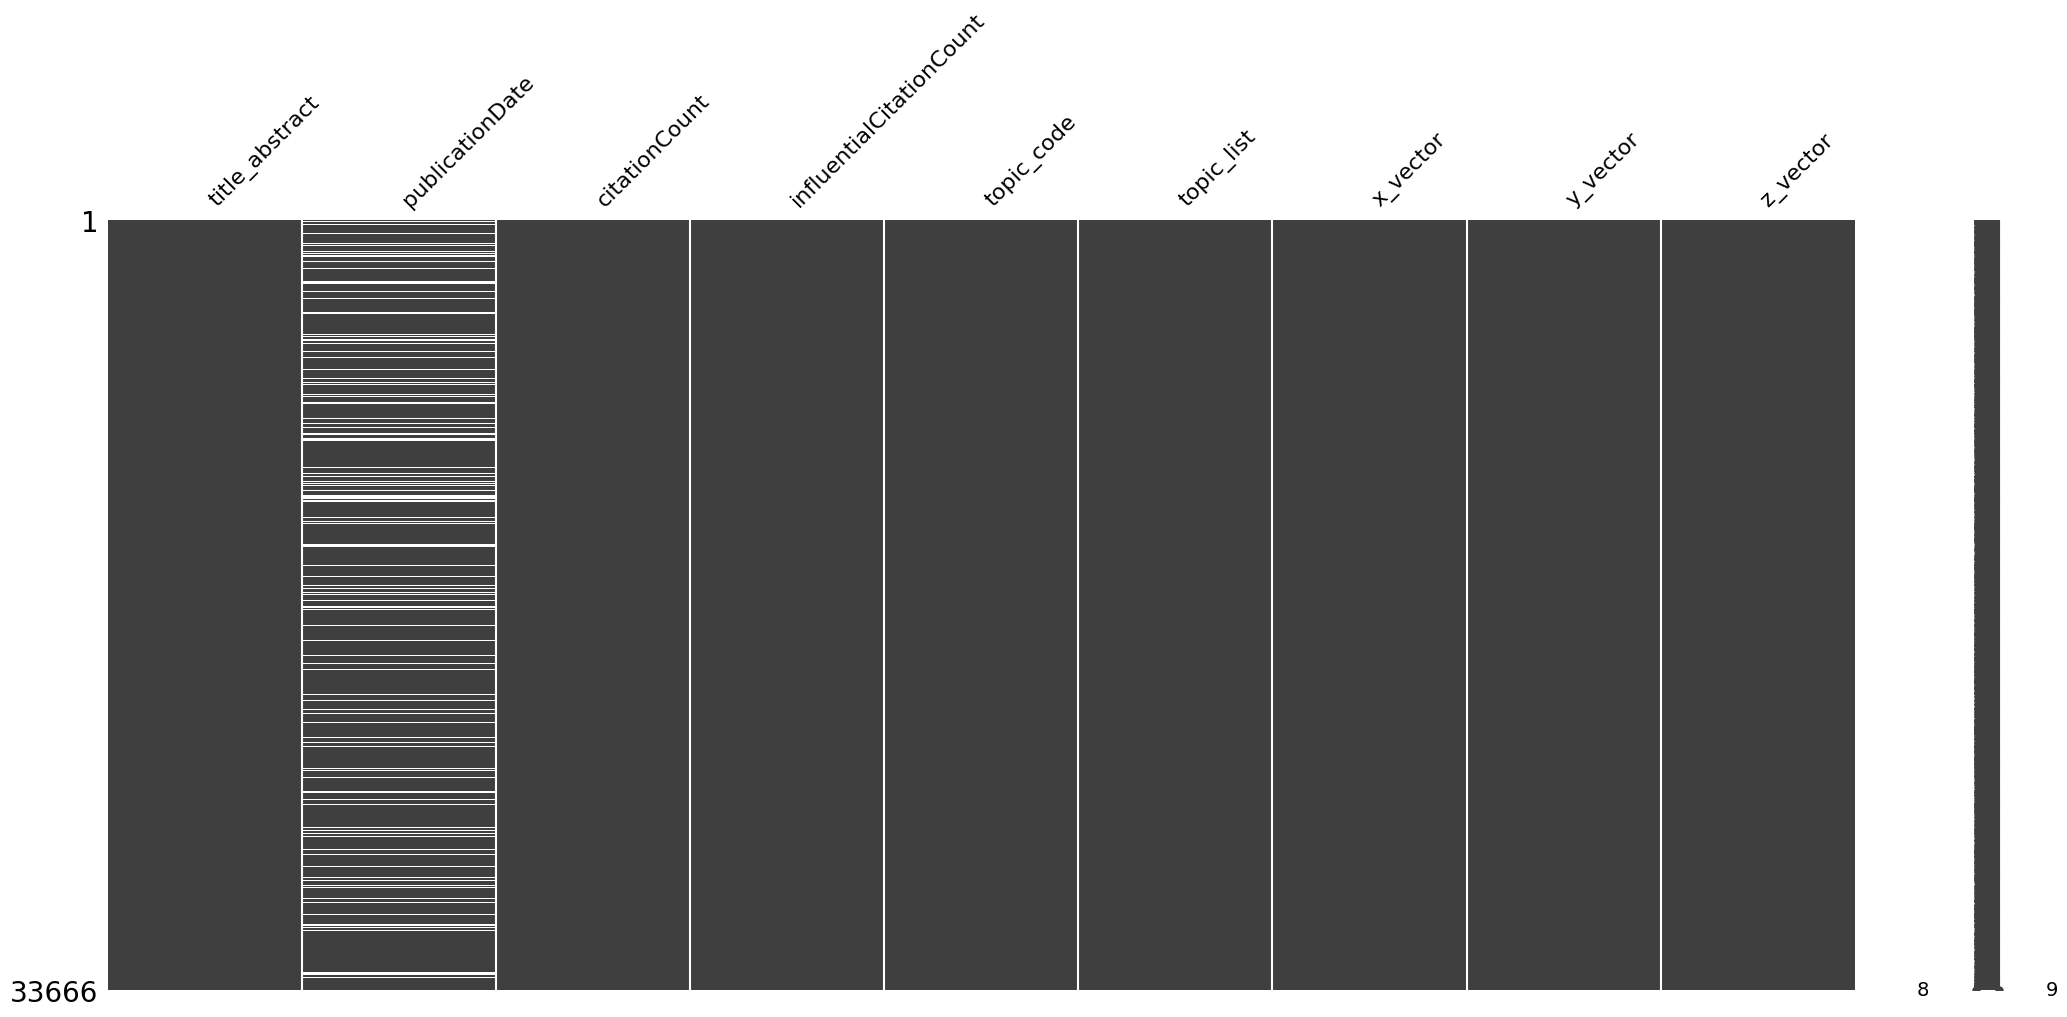

In [40]:
msno.matrix(df)

Deleting all the rows with at least 1 missing value:

In [41]:
df= df.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28956 entries, 0 to 53831
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title_abstract            28956 non-null  object        
 1   publicationDate           28956 non-null  datetime64[ns]
 2   citationCount             28956 non-null  int64         
 3   influentialCitationCount  28956 non-null  int64         
 4   topic_code                28956 non-null  int64         
 5   topic_list                28956 non-null  object        
 6   x_vector                  28956 non-null  float64       
 7   y_vector                  28956 non-null  float64       
 8   z_vector                  28956 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 2.2+ MB


In [43]:
df['topic_code'].nunique()

118

In [44]:
df_groupby_topics = df.groupby('topic_code')

In [45]:
df_grouped_topics = df_groupby_topics['citationCount'].sum().reset_index()

In [46]:
df_grouped_topics.head(10)

,topic_code,citationCount
0,0,1723879
1,1,934011
2,2,571117
3,3,648812
4,4,109435
5,5,890091
6,6,321802
7,7,161186
8,8,153735
9,9,598476


In [47]:
df_grouped_topics = df_grouped_topics.sort_values(by='citationCount', ascending=False)

In [48]:
df_grouped_topics = df_grouped_topics.rename(columns={'citationCount': 'Topic_citationCount'})

In [49]:
df_grouped_topics.head(10)

,topic_code,Topic_citationCount
0,0,1723879
1,1,934011
5,5,890091
3,3,648812
9,9,598476
2,2,571117
11,11,527624
14,14,482216
17,17,332376
6,6,321802


In [50]:
df_merge = pd.merge(df, df_grouped_topics, on='topic_code')

In [51]:
df_sorted_topic_citations = df_merge.sort_values(by='Topic_citationCount', ascending=False)

In [52]:
df_sorted_topic_citations.head(2)

,title_abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector,Topic_citationCount
3081,"Studies Interaction Predators Prey analysis numerical interaction goes generation generation predator prey undoubtedly throw light dynamics animal populations. (G. F. G.) summarised experimental investigations subject (3, 4). However, felt desirable confirm conclusions extensive experimental material, cases collected data accounted theoretically greater detail. object present paper results investigations carried lines.",1936-05-01,208,10,0,0_species_soil_plant_plants,4.357668,5.081448,7.889723,1723879
2603,Anatomy Adaptation Climate Change Variability,2000-04-01,1571,82,0,0_species_soil_plant_plants,5.408161,4.578766,7.847830,1723879


In [56]:
df.head(2)

,title_abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector
0,"Acoustical characteristics tinnitus. analysis. recognition tinnitus aurium problem otological practice recent years problem audiological practice widespread. Unfortunately, little published research symptom. hoped report Reed 7 signaled beginning systematic investigations nonvibratory tinnitus aurium. Clinical observations indicate studies tinnitus medical nonmedical specialties value. training audiologists dictated investigation focus acoustical characteristics symptom. published studies various acoustical characteristics tinnitus present investigation undertaken, 2 primary goals set. objective develop basic methodology use measurement acoustical characteristics nonvibratory tinnitus aurium. primary goal determine group differences existed normal",1962-02-01,69,1,20,20_hearing_ear_auditory_hearing loss,2.364143,5.038495,3.597319
1,"Reproductive steroids bovine. VI. Changes interrelationships 0 260 days pregnancy. Summary Urine blood samples collected pregnant dairy cows days 0, 7, 14, 19, 28, 35, 42, 65, 95, 125, 155, 185, 200, 215, 230, 245 260 days breeding. cows subsequently delivered heathy single offspring. objectives evaluate in- terrelationships rates excretion estrogens urine concentrations pro- gesterone, luteinizing hormone (LH), corti- costerone cortisol jugular blood plasma. significant change rate ex- cretion urinary estrogens increase estradiol-17a day 42 compared day 35 day 65. day 65 rates excretion estradiol-17~ (P<.01) estrone (P< .05) accelerated 20-fold 6-fold higher, respectively, day 230. Differences rate excretion estradiol-17fl days significant (P<.05) generally consistently higher midpreg- nancy. Levels plasma LH decreased (P<.01) progesterone increased (P<.05) day 0 day 7. Levels plasma LH did change day 7 corticoids did increase significantly (P<.25) 0 260 days pregnancy. Plasma progester- increased (P<.01) day 7 (9 ng/ml) day 42 (20 ng/ml), decreased day 42 day 125 (10 ng/ml; P<.01) gen- erally increased maximum average level (26 ng/ml) day 245 (P<.01) de- creasing 14 ng/ml day 260 (P<.01). Partial regressions, derived multiple re- gression analysis including hormones days independent variables used define hormone interrelationships. Plasma pro- gesterone positively related (P<.05) urinary estradiol-17p 7 42 days negatively related (P<.10) LH 42 260 days. partial regressions estradiol-17~ (positive) estrone (nega- tive) significant (P<.01) 7 260 days gestation plasma cortisol dependent variable. Literature Cited Amoroso, E. C. I952. Placentation. A. S. Parkes (Ed.). Marshall's Physiology Reproduction. Vol. II. Longman, Green, London. Biomedical Computer Programs. 1964. W. J. Dixon (Ed.). Health Sciences Computing Facility, De- partment Preventive Medicine Public Health, School Medicine, University Cali- fornia, Los Angeles. Bowerman, A. M., L. L. Anderson R. M. Mel- ampy. 1964. Urinary estrogens cycling, pregnant, ovariectomized hysterectomized gilts. Iowa State J. Sci. 38:437. Edgerton, L. A. R. E. Erb. 1971a. Metabolites orogesterone estrogen domestic sow urine. I. Effect pregnancy. J. Anita. Sci. 32:515. Edgerton, L. A. R. E. Erb. 1971b. Metabolites progesterone estrogen domestic sow urine. II. Changes pre- postpartum effect feeding 6 methyl-17-acetoxy-progesterone. J. Anim. Sci. 32:930. Erb, R. E., V. L. Estergreen, Jr., W. R. Gomes, E. D. Plotka O. L. Frost. 1968a. Progestin levels corpora htea progesterone ovarian venous Downloaded jas.fass.org",1971-07-01,51,0,26,26_hormone_estrogen_lh_pituitary,2.281632,3.871610,6.215812


In [57]:
# Extract the year and the month and save it as a new column 'yea_month'
df['year'] = df['publicationDate'].dt.strftime('%Y')

In [59]:
df['month'] = df['publicationDate'].dt.strftime('%m')

In [60]:
# Extract the year and the month and save it as a new column 'yea_month'
df['year_month'] = df['publicationDate'].dt.strftime('%Y-%m')

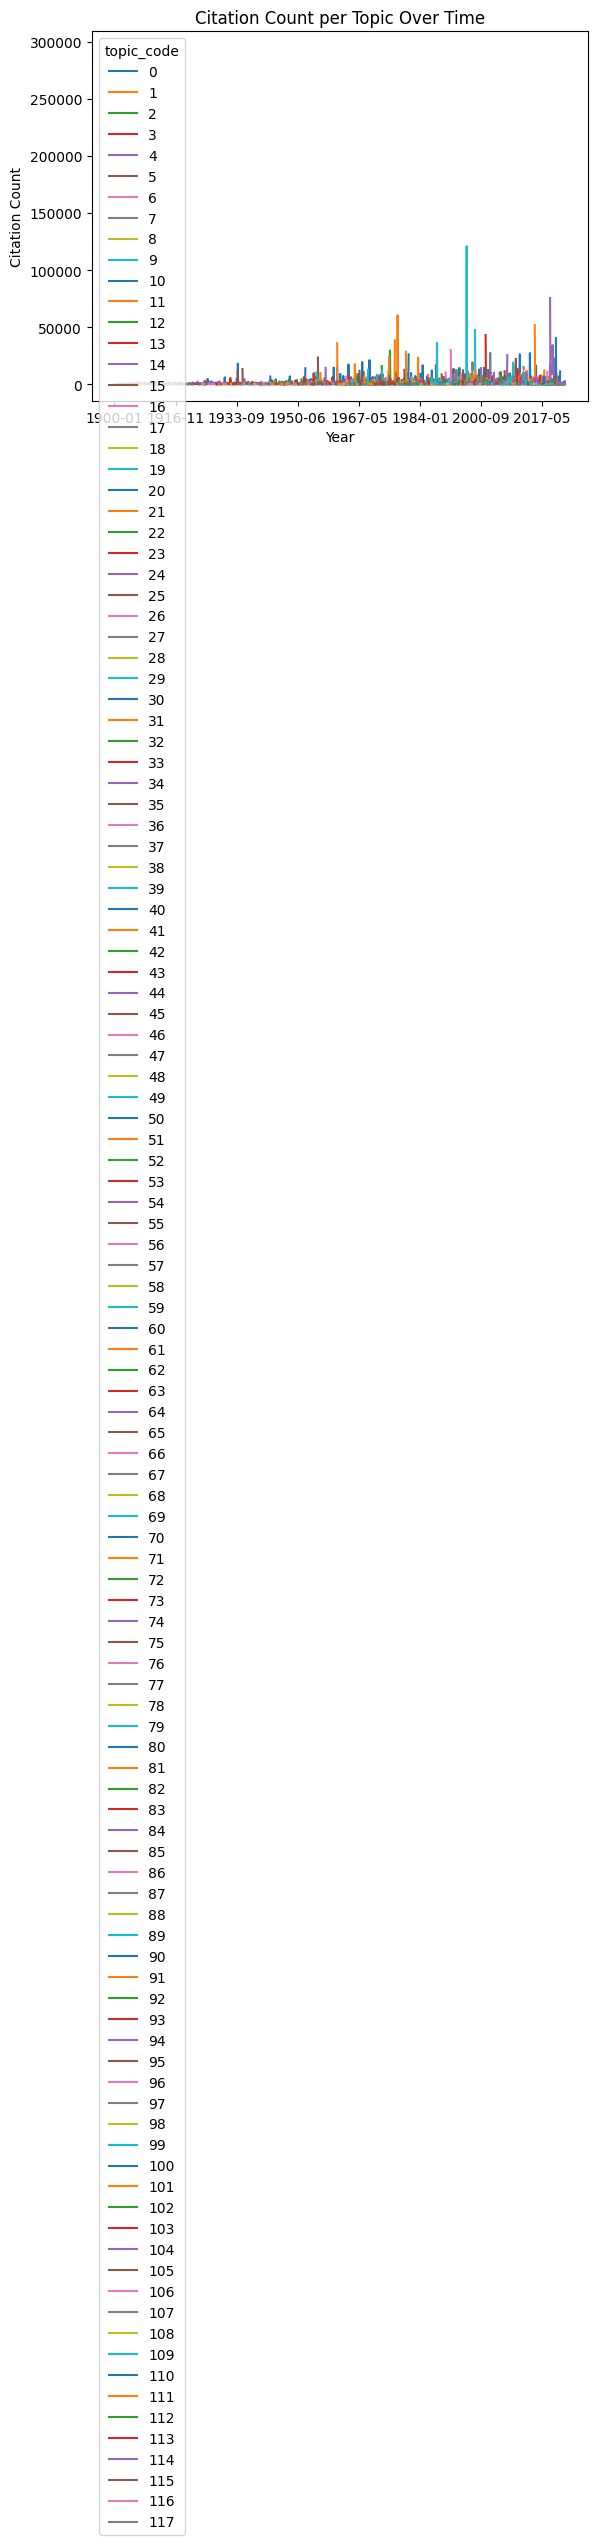

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by "Topic" and "Timestamp" and aggregate "Frequency"
grouped_df = df.groupby(['topic_code', 'year_month'])['citationCount'].sum().reset_index()

# Pivot the DataFrame to get years on the x-axis and Topic Frequencies as columns
pivot_df = grouped_df.pivot(index='year_month', columns='topic_code', values='citationCount')

# Plot the data with a legend
pivot_df.plot(kind='line', legend=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Citation Count')
plt.title('Citation Count per Topic Over Time')

# Show the plot
plt.show()   

In [62]:
pivot_df

topic_code,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
year_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1900-01,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-02,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-03,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-04,NaN,NaN,NaN,71.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-05,NaN,NaN,NaN,147.0,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05,37.0,NaN,73.0,141.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN,1978.0,12.0,NaN,NaN,39.0,NaN,59.0,NaN,NaN,NaN,NaN,36.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,4110.0,NaN,NaN,NaN,194.0,NaN,NaN,NaN
2023-06,609.0,NaN,NaN,968.0,NaN,80.0,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN

In [63]:
pivot_df.fillna(0, inplace=True)

In [64]:
pivot_df = pivot_df.reset_index()

In [65]:
pivot_df 

topic_code,year_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,1900-01,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-02,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-03,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-04,0.0,0.0,0.0,71.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-05,0.0,0.0,0.0,147.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2023-05,37.0,0.0,73.0,141.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,1978.0,12.0,0.0,0.0,39.0,0.0,59.0,0.0,0.0,0.0,0.0,36.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,4110.0,0.0,0.0,0.0,194.0,0.0,0.0,0.0
1473,2023-06,609.0,0.0,0.0,968.0,0.0,80.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [67]:
pivot_df['year_month'] = pd.to_datetime(pivot_df['year_month'], format='%Y-%m')

In [70]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 119 entries, year_month to 117
dtypes: datetime64[ns](1), float64(118)
memory usage: 1.3 MB


In [71]:
# Separating the training set and testing set
train_data=pivot_df[pivot_df['year_month'].dt.year<2016].reset_index(drop = True)
test_data=pivot_df[pivot_df['year_month'].dt.year>2015].reset_index(drop = True)

In [72]:
# Define the target column (Topic you want to forecast)
target_topic = 0  # Change this to the Topic you want to forecast

# Prepare the training and testing data
X_train = train_data.drop(target_topic, axis=1)
y_train = train_data[target_topic]  # Shift by 1 to align with next year's frequency
X_test = test_data.drop(target_topic, axis=1)
y_test = test_data[target_topic]

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import plot_importance

Root Mean Squared Error (RMSE): 1971.6069822840273


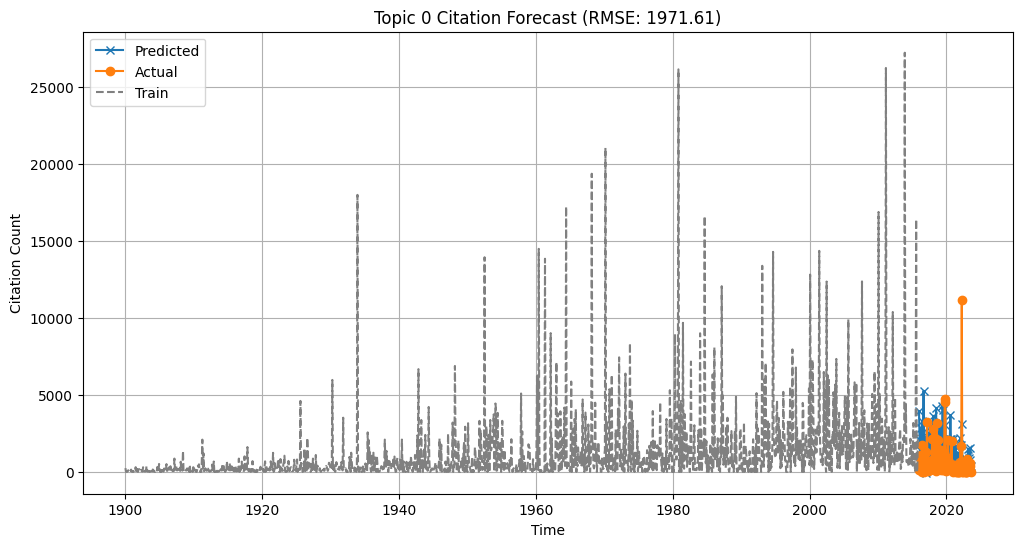

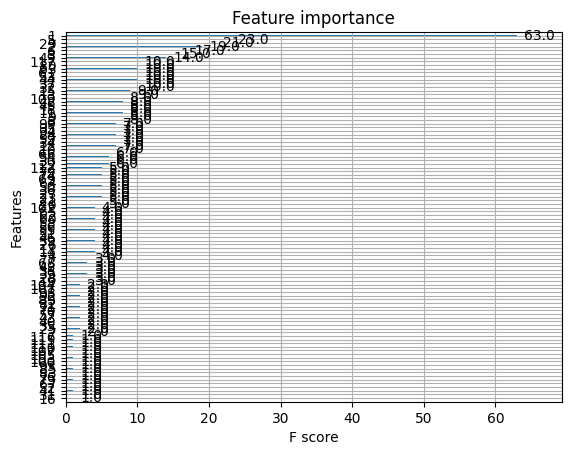

In [75]:
# Shift the target column to align with next year's frequency
y_train = train_data[target_topic].shift(-1).dropna()
y_test = test_data[target_topic].shift(-1).dropna()

# Exclude the 'year_month' column from the training and testing data
X_train = train_data.drop(columns=['year_month', target_topic]).iloc[:-1]
X_test = test_data.drop(columns=['year_month', target_topic]).iloc[:-1]

# Create an XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame with year_month and the predicted values
y_pred_df = pd.DataFrame({'year_month': test_data['year_month'].iloc[:-1], 'Predicted': y_pred})

# Merge the predicted DataFrame with the original test_data DataFrame
merged_data = pd.merge(y_pred_df, test_data, on='year_month')

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted vs. actual values along with y_train
plt.figure(figsize=(12, 6))
plt.plot(merged_data['year_month'], merged_data['Predicted'], label='Predicted', marker='x')
plt.plot(merged_data['year_month'], merged_data[target_topic], label='Actual', marker='o')
plt.plot(train_data['year_month'].iloc[:-1], y_train, label='Train', linestyle='--', color='gray')
plt.xlabel('Time')
plt.ylabel('Citation Count')
plt.title(f'Topic {target_topic} Citation Forecast (RMSE: {rmse:.2f})')
plt.legend()
plt.grid(True)

# Feature importance plot (optional)
plot_importance(model)
plt.show()

Root Mean Squared Error (RMSE): 1971.6069822840273


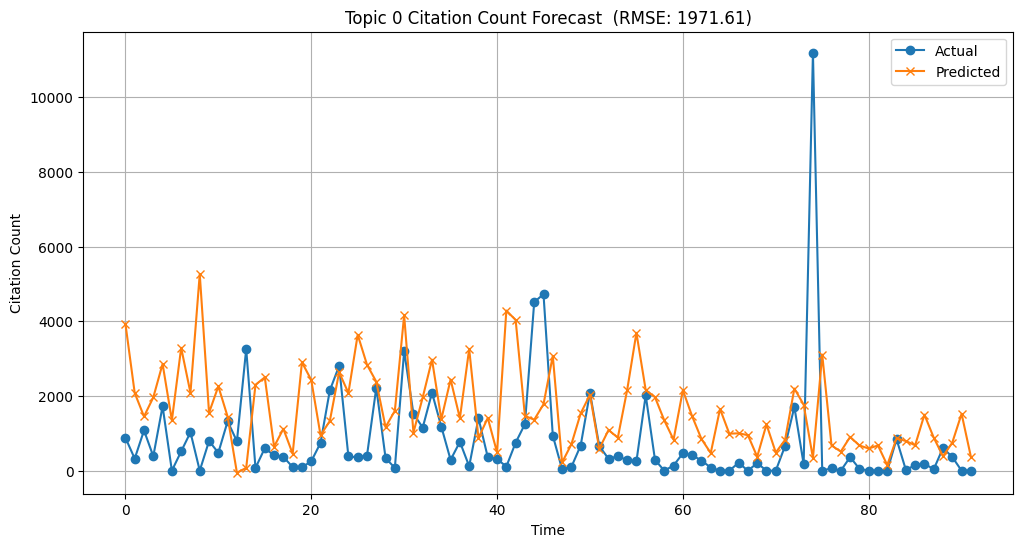

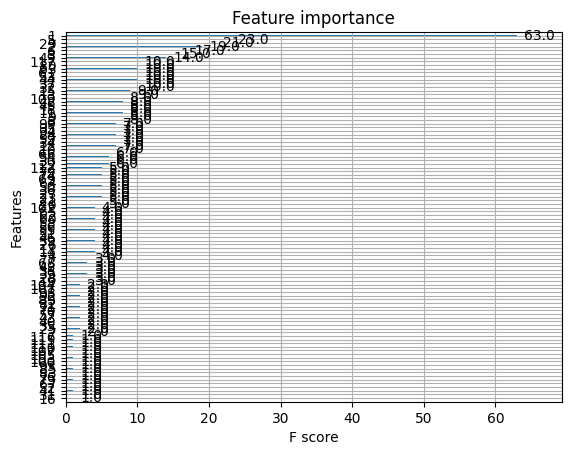

In [82]:
# Shift the target column to align with next year's frequency
y_train = train_data[target_topic].shift(-1).dropna()
y_test = test_data[target_topic].shift(-1).dropna()

# Exclude the 'Timestamp' column from the training and testing data
X_train = train_data.drop(columns=['year_month', target_topic]).iloc[:-1]
X_test = test_data.drop(columns=['year_month', target_topic]).iloc[:-1]

# Create an XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[:-1], y_test, label='Actual', marker='o')
plt.plot(test_data.index[:-1], y_pred, label='Predicted', marker='x')
plt.xlabel('Time')
plt.ylabel('Citation Count')
plt.title(f'Topic {target_topic} Citation Count Forecast  (RMSE: {rmse:.2f})')
plt.legend()
plt.grid(True)

# Feature importance plot (optional)
plot_importance(model)
plt.show()

With data starting from 1950:

In [91]:
pivot_df

topic_code,year_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,1900-01-01,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-02-01,242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-03-01,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-04-01,0.0,0.0,0.0,71.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-05-01,0.0,0.0,0.0,147.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2023-05-01,37.0,0.0,73.0,141.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,1978.0,12.0,0.0,0.0,39.0,0.0,59.0,0.0,0.0,0.0,0.0,36.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,4110.0,0.0,0.0,0.0,194.0,0.0,0.0,0.0
1473,2023-06-01,609.0,0.0,0.0,968.0,0.0,80.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [90]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 119 entries, year_month to 117
dtypes: datetime64[ns](1), float64(118)
memory usage: 1.3 MB


In [97]:
# Filter the DataFrame for rows starting from 2005
pivot_df_1950 = pivot_df[pivot_df['year_month'].dt.year >= 1950]

In [98]:
# Separating the training set and testing set
train_data=pivot_df_1950[pivot_df_1950['year_month'].dt.year<2016].reset_index(drop = True)
test_data=pivot_df_1950[pivot_df_1950['year_month'].dt.year>2015].reset_index(drop = True)

In [99]:
# Define the target column (Topic you want to forecast)
target_topic = 0  # Change this to the Topic you want to forecast

# Prepare the training and testing data
X_train = train_data.drop(target_topic, axis=1)
y_train = train_data[target_topic]  # Shift by 1 to align with next year's frequency
X_test = test_data.drop(target_topic, axis=1)
y_test = test_data[target_topic]

Root Mean Squared Error (RMSE): 2169.851522100616


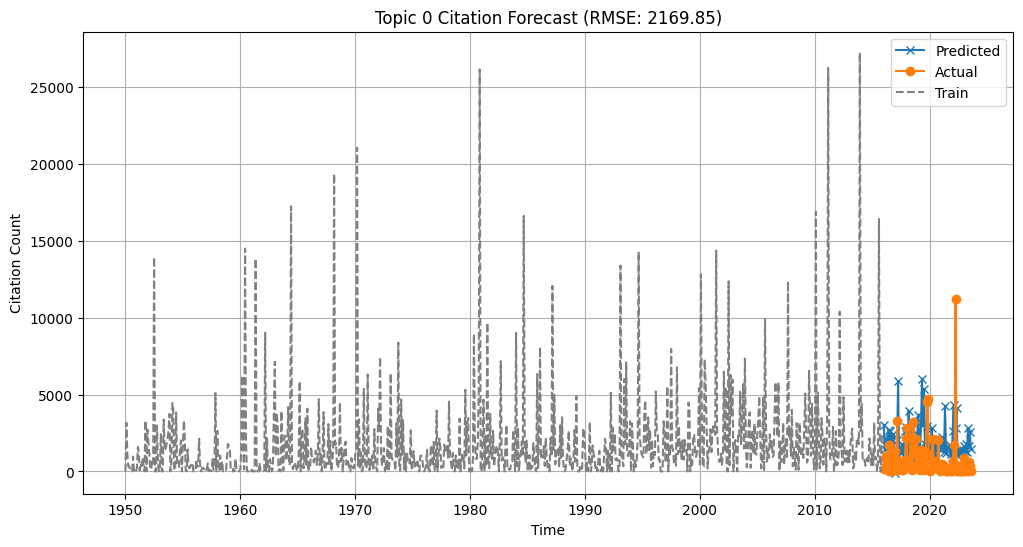

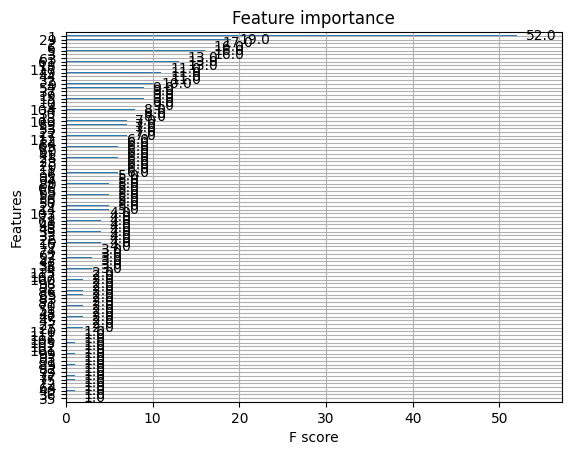

In [100]:
# Shift the target column to align with next year's frequency
y_train = train_data[target_topic].shift(-1).dropna()
y_test = test_data[target_topic].shift(-1).dropna()

# Exclude the 'year_month' column from the training and testing data
X_train = train_data.drop(columns=['year_month', target_topic]).iloc[:-1]
X_test = test_data.drop(columns=['year_month', target_topic]).iloc[:-1]

# Create an XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame with year_month and the predicted values
y_pred_df = pd.DataFrame({'year_month': test_data['year_month'].iloc[:-1], 'Predicted': y_pred})

# Merge the predicted DataFrame with the original test_data DataFrame
merged_data = pd.merge(y_pred_df, test_data, on='year_month')

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted vs. actual values along with y_train
plt.figure(figsize=(12, 6))
plt.plot(merged_data['year_month'], merged_data['Predicted'], label='Predicted', marker='x')
plt.plot(merged_data['year_month'], merged_data[target_topic], label='Actual', marker='o')
plt.plot(train_data['year_month'].iloc[:-1], y_train, label='Train', linestyle='--', color='gray')
plt.xlabel('Time')
plt.ylabel('Citation Count')
plt.title(f'Topic {target_topic} Citation Forecast (RMSE: {rmse:.2f})')
plt.legend()
plt.grid(True)

# Feature importance plot (optional)
plot_importance(model)
plt.show()